In [9]:
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import codecs 
from PIL import Image
import numpy as np

import nltk   
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

import re
from collections import Counter
from nltk.corpus import brown
from pytagcloud import create_tag_image, make_tags, LAYOUT_HORIZONTAL

# Alice in Wonderland example

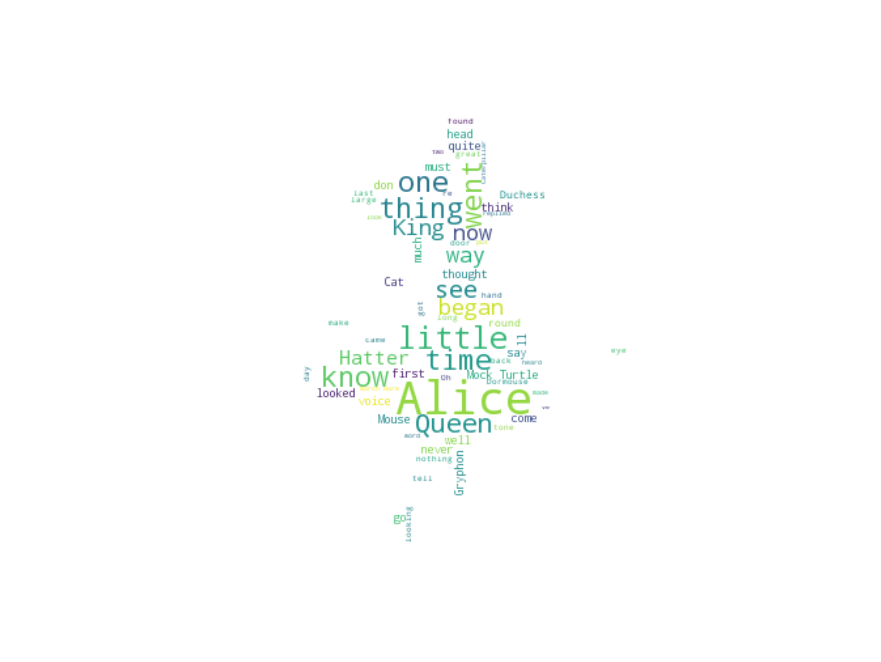

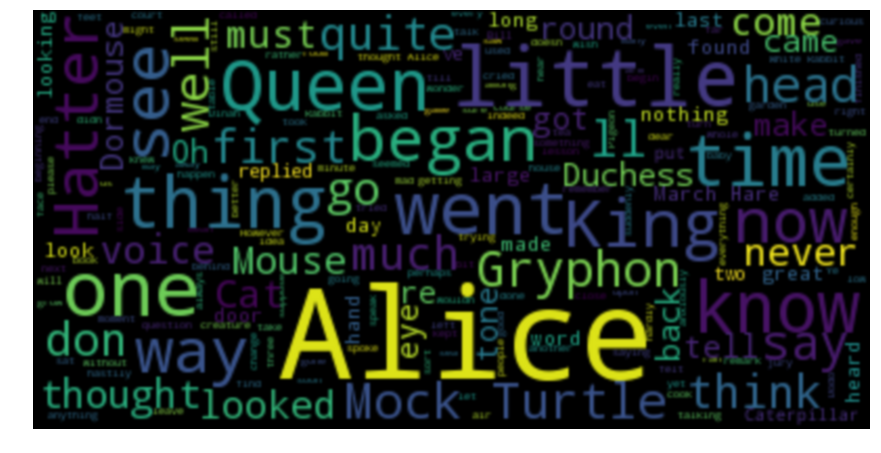

In [58]:
# Read the whole text.
filename = "C:/Users/PDudukin/Documents/Python Scripts/RNN/wonderland.txt"
file = codecs.open(filename,'r','utf-8-sig')
text = file.read() 

alice_mask = np.array(Image.open("sphx_glr_masked_002.png"))
# Generate a word cloud image
stopwords = STOPWORDS
stopwords.add("said")
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=2000, mask=alice_mask).generate(text)

plt.figure(figsize=(15,30))
# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# lower max_font_size
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(15,30))
#plt.figure()
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation="bicubic")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

# Timepad Word Clouds by categories

In [10]:
path = 'D:/'
category = pd.read_csv(path+'category.csv')
event_category = pd.read_csv(path+'event_category.csv')
event = pd.read_csv(path+'event.csv')

C:\Users\PDudukin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
event.shape

(511499, 24)

In [12]:
category.head(2)

,description,id,name,status,tag,type
0,NaN,14,образование и наука,inactive,NaN,category
1,NaN,16,культура и искусство,inactive,NaN,category


In [13]:
event_category.head(2)

,category,event,id,moderated,org
0,16,134,122,NaN,NaN
1,17,84,123,NaN,NaN


In [14]:
event.head(2)

,allow_multireg,begin,blocked,cascade_store,city,contact,created_at,culture,description,enable_comments,...,organization,parent,place,private,reglimit,shortdescription,status,twitter_keywords,updated_at,use_urpayments
0,0,2013-04-03 12:00:00,0,"a:5:{s:18:""to_end_description"";s:340:""<p>Извин...",Каменец-Подольский,NaN,2013-01-09 13:15:53,ru,"<div class=""event_description"">\n<p>Запуск биз...",1,...,55,NaN,Место и адрес проведения уточняются.,0,0,NaN,ok,NaN,2013-08-19 09:28:23,1
1,1,2013-04-06 15:00:00,0,"a:6:{s:16:""template_version"";s:8:""20130322"";s:...",Москва,NaN,2013-03-22 18:50:09,ru,<p><strong>О лекции: </strong>Нейробиологам из...,1,...,14098,NaN,"ул. Большая Полянка, 65/74, стр. 1. FAQcafe",0,0,Фестиваль «Искусство науки 2013» приглашает Ва...,ok,NaN,2013-08-19 09:05:50,0


In [15]:
print(event.columns)
print(category.columns)
print(event_category.columns)

Index(['allow_multireg', 'begin', 'blocked', 'cascade_store', 'city',
       'contact', 'created_at', 'culture', 'description', 'enable_comments',
       'end', 'hits', 'id', 'name', 'organization', 'parent', 'place',
       'private', 'reglimit', 'shortdescription', 'status', 'twitter_keywords',
       'updated_at', 'use_urpayments'],
      dtype='object')
Index(['description', 'id', 'name', 'status', 'tag', 'type'], dtype='object')
Index(['category', 'event', 'id', 'moderated', 'org'], dtype='object')


In [16]:
e_event_category = pd.merge(event, event_category, how='left', left_on='id', right_on='event')
data = pd.merge(e_event_category, category, how='left', left_on='category', right_on='id')
data.to_csv('D:/data1.csv', encoding='utf-8')

In [18]:
cols = ['city',
        'description_x',
        'name_x',
        #'shortdescription',
        'updated_at',
        'name_y'
        ]

data = pd.read_csv('D:/data1.csv', usecols=cols, encoding='utf-8')

In [19]:
data.head()

,city,description_x,name_x,updated_at,name_y
0,Каменец-Подольский,"<div class=""event_description"">\n<p>Запуск биз...","Деловая игра ""Железный предприниматель"" Камене...",2013-08-19 09:28:23,Тренинг
1,Каменец-Подольский,"<div class=""event_description"">\n<p>Запуск биз...","Деловая игра ""Железный предприниматель"" Камене...",2013-08-19 09:28:23,Бизнес
2,Каменец-Подольский,"<div class=""event_description"">\n<p>Запуск биз...","Деловая игра ""Железный предприниматель"" Камене...",2013-08-19 09:28:23,ИТ и интернет
3,Каменец-Подольский,"<div class=""event_description"">\n<p>Запуск биз...","Деловая игра ""Железный предприниматель"" Камене...",2013-08-19 09:28:23,Бизнес
4,Москва,<p><strong>О лекции: </strong>Нейробиологам из...,"Лекция Елизаветы Муратовой «Фотокомпозиция, цв...",2013-08-19 09:05:50,Лекция


In [20]:
data.columns

Index(['city', 'description_x', 'name_x', 'updated_at', 'name_y'], dtype='object')

In [21]:
data['year'] = data['updated_at'].map(lambda x: int(x[:4]))
data['month'] = data['updated_at'].map(lambda x: int(x[5:7]))
data['day'] = data['updated_at'].map(lambda x: int(x[8:10]))

In [22]:
data.head()

,city,description_x,name_x,updated_at,name_y,year,month,day
0,Каменец-Подольский,"<div class=""event_description"">\n<p>Запуск биз...","Деловая игра ""Железный предприниматель"" Камене...",2013-08-19 09:28:23,Тренинг,2013,8,19
1,Каменец-Подольский,"<div class=""event_description"">\n<p>Запуск биз...","Деловая игра ""Железный предприниматель"" Камене...",2013-08-19 09:28:23,Бизнес,2013,8,19
2,Каменец-Подольский,"<div class=""event_description"">\n<p>Запуск биз...","Деловая игра ""Железный предприниматель"" Камене...",2013-08-19 09:28:23,ИТ и интернет,2013,8,19
3,Каменец-Подольский,"<div class=""event_description"">\n<p>Запуск биз...","Деловая игра ""Железный предприниматель"" Камене...",2013-08-19 09:28:23,Бизнес,2013,8,19
4,Москва,<p><strong>О лекции: </strong>Нейробиологам из...,"Лекция Елизаветы Муратовой «Фотокомпозиция, цв...",2013-08-19 09:05:50,Лекция,2013,8,19


In [23]:
texts_2013 = []
texts_2014 = []
texts_2015 = []
texts_2016 = []
texts_2017 = []

data['description_x'] = data['description_x'].fillna('Not_available')

for row in data.index:
    #print(row)
    if data.loc[row,'name_y'] == 'Бизнес' and data.loc[row,'city'] == 'Москва':
        if data.loc[row,'year'] == 2013:
            texts_2013.append(BeautifulSoup(data.loc[row,'description_x'],"lxml").get_text())
        elif data.loc[row,'year'] == 2014:
            texts_2014.append(BeautifulSoup(data.loc[row,'description_x'],"lxml").get_text())
        elif data.loc[row,'year'] == 2015:
            texts_2015.append(BeautifulSoup(data.loc[row,'description_x'],"lxml").get_text())
        elif data.loc[row,'year'] == 2016:
            texts_2016.append(BeautifulSoup(data.loc[row,'description_x'],"lxml").get_text())
        elif data.loc[row,'year'] == 2017:
            texts_2017.append(BeautifulSoup(data.loc[row,'description_x'],"lxml").get_text())       

In [26]:
D_except = {'(': ' '
            ,')': ' '
            ,'[': ' '
            ,']': ' '
            ,'{': ' '
            ,'}': ' '
            ,'&': ' '
            ,'@': ' '
            ,'#': ' '
            ,'$': ' '
            ,'%': ' '
            ,'№': ' '
            ,'*': ' '
            ,'—': ' '
            ,'\u0301': ''
            ,';': ' '
            ,':': ' '
            ,'/': ' '
            ,'\\': ' '
            ,'+': ' '
            ,'?': ' '
            ,'\n': ' '
            ,'\xa0': ' '
            ,'-': ' '
            ,'“': ' '
            ,'"': ' '
            ,'.': ' '
            ,'!': ' '
            ,',': ' '
            ,'”': ' '
            ,'–': ' '
            ,'«': ' '
            ,'»': ' '
           }

In [27]:
fonts = [#'Nobile', 
         #'Old Standard TT', 
         #'Cantarell', 
         #'Reenie Beanie', 
         #..'Cuprum', 
         #'Molengo', 
         #..'Neucha', 
         'Philosopher', 
         #'Yanone Kaffeesatz', 
         #'Cardo', 
         #'Neuton', 
         #'Inconsolata', 
         #'Crimson Text', 
         #'Josefin Sans', 
         #'Droid Sans', 
         #'Lobster', 
         #'IM Fell DW Pica', 
         #'Vollkorn', 
         #'Tangerine', 
         #'Coustard', 
         #'PT Sans Regular'
        ]
import random
font = random.choice(fonts)
#print(font)

num = 15
stop_words = stopwords.words('russian')
stop_words.extend(['это','http','www', 'Not_available'])
stop_words.append('')
text = []
for id in range(500):
    text.extend(re.sub('.', lambda m: D_except.get(m.group(), m.group()), re.sub('([\(\[]).*?([\)\]])',' ',texts_2017[id].replace('\n',' '))).split(' '))

text = [x for x in [x.lower() for x in text if x not in stop_words] if x not in stop_words and x.isalpha()]
print(Counter(text).most_common(10))
create_tag_image(make_tags(Counter(text).most_common(250), maxsize=50), 'cloud.png', size=(800, 600), fontname='Philosopher', rectangular=True, layout=LAYOUT_HORIZONTAL)
Image.open('cloud.png').show()

[('бизнес', 489), ('мастер', 402), ('компании', 359), ('бизнеса', 234), ('работы', 220), ('проведения', 217), ('класс', 212), ('которые', 207), ('ru', 191), ('вопросы', 190)]


In [15]:
def SaveFigureAsImage(fileName,fig=None,**kwargs):
    ''' Save a Matplotlib figure as an image without borders or frames.
       Args:
            fileName (str): String that ends in .png etc.

            fig (Matplotlib figure instance): figure you want to save as the image
        Keyword Args:
            orig_size (tuple): width, height of the original image used to maintain 
            aspect ratio.
    '''
    fig_size = fig.get_size_inches()
    w,h = fig_size[0], fig_size[1]
    fig.patch.set_alpha(0)
    if 'orig_size' in kwargs: # Aspect ratio scaling if required
        w,h = kwargs['orig_size']
        w2,h2 = fig_size[0],fig_size[1]
        fig.set_size_inches([(w2/w)*w,(w2/w)*h])
        fig.set_dpi((w2/w)*fig.get_dpi())
    a=fig.gca()
    a.set_frame_on(False)
    a.set_xticks([]); a.set_yticks([])
    plt.axis('off')
    plt.xlim(0,h); plt.ylim(w,0)
    fig.savefig(fileName, transparent=True, bbox_inches='tight', \
                        pad_inches=0)

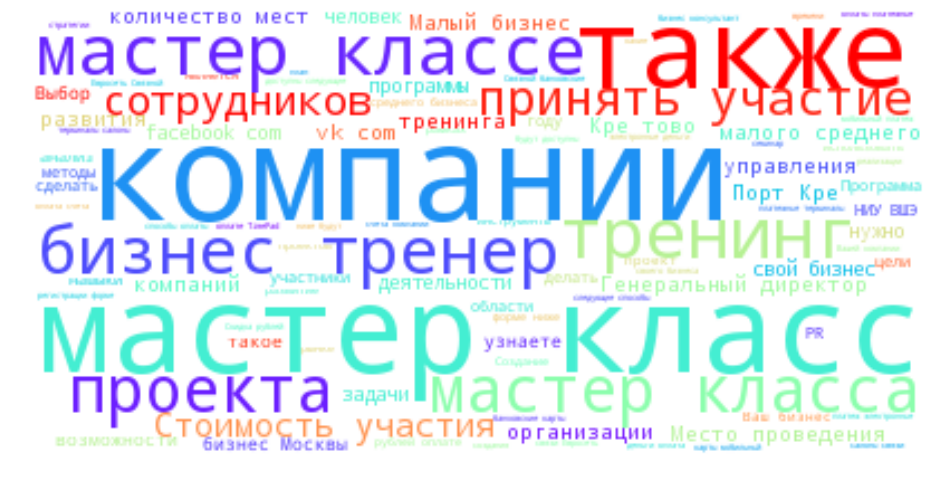

In [38]:
wordcloud = WordCloud(
                        max_font_size=60, 
                        #max_words=200, 
                        stopwords=set(stop_words),
                        #font_path = 'C:/Windows/Fonts/sans-serif.ttf',
                        #width=3,
                        #height=2,
                        prefer_horizontal=1,
                        background_color='white',
                        colormap = 'rainbow'
                    ).generate(' '.join(texts_2013))
myfig = plt.figure(figsize=(16,9))
#plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.savefig('Бизнес-Москва-2013.png', dpi=10, bbox_inches='tight', pad_inches = 0.1)
#SaveFigureAsImage('Бизнес-Москва-2013.png', plt.gcf(), orig_size=(960,720))
plt.show()

In [ ]:
my_dpi = 300
stop_words = stopwords.words('russian')
stop_words.extend(['это','http','www', 'Not_available'])
wordcloud = WordCloud(
                        max_font_size=60, 
                        max_words=2000, 
                        stopwords=set(stop_words),
                        #font_path = 'C:/Windows/Fonts/sans-serif.ttf',
                        width=3,
                        height=2
                    ).generate(' '.join(texts_2017))
#plt.figure(figsize=(3, 4), dpi=my_dpi)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('Бизнес-Москва-2017.pdf', dpi=my_dpi, bbox_inches='tight', pad_inches = 0.1)
plt.show()

# Description cleaning

In [29]:
texts_2013[0]

'“Никто не даст нам избавленья, ни царь, ни Бог и ни герой!\nДобьёмся мы освобожденья своею собственной рукой!”\nИнтернационал\n\xa0\n“Лошадь можно привести к водопою, но нельзя заставить её пить”\nКитайская поговорка\n\xa0\nСодержание программы:\n- Личная эффективность.\n- Финансовая эффективность.\n- Бизнес-план.\n- Управление и Учет.\n- Продвижение и Продажи.\n\xa0\nПодробное содержание программы:\xa0\nШаг 1: Личная эффективность.\xa0\n\nЭффективное общение.\nЭффективное обучение и развитие.\nЭффективное действие.\xa0\nШаг 2: Финансовая эффективность.\xa0\n\nПринципы учета.\nОтчет о движении денежных средств.\nОтчет о прибылях и убытках.\nБюджет.\nИздержки.\nСопутствующие издержки.\nТочка безубыточности.\nТочка возврата инвестиций.\xa0\nШаг 3: Бизнес-план.\xa0\n\nУправленческое резюме.\nМиссия.\nЦели.\nСтратегия.\nОписание составляющих бизнеса.\nПортфель товаров и услуг.\nПродуктовая стратегия.\nМаркетинговая стратегия.\nМатрица коммуникаций.\nОрганизационная структура.\nБизнес стру

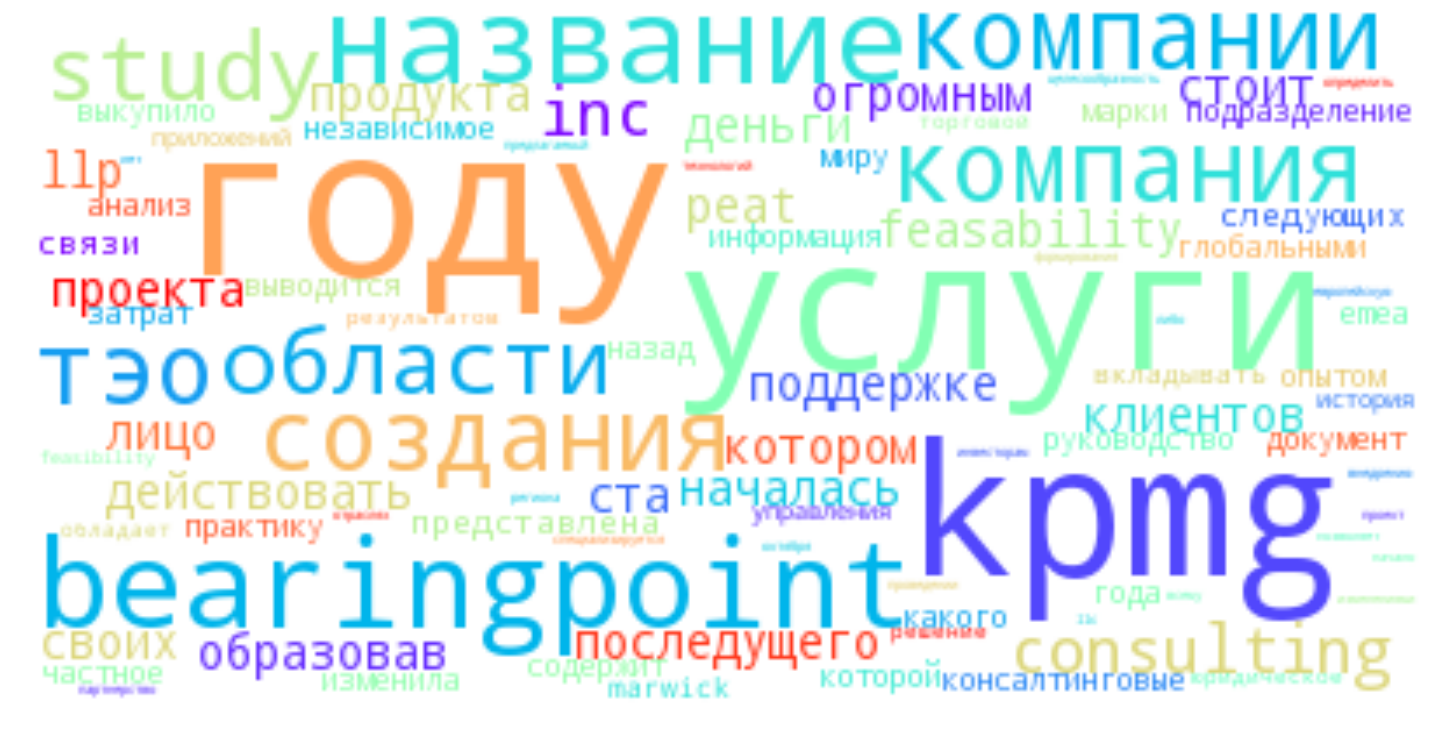

In [161]:
id = 253
num = 15
text = re.sub('.', lambda m: D_except.get(m.group(), m.group()), re.sub('([\(\[]).*?([\)\]])',' ',texts_2013[id].replace('\n',' ')))
stop_words.append('')
text = [x for x in [x.lower() for x in text.split(' ') if x not in stop_words] if x not in stop_words]
[x[0] for x in Counter(text).most_common(num)]

wordcloud = WordCloud(
                        max_font_size=60, 
                        #max_words=200, 
                        stopwords=set(stop_words),
                        font_path = 'C:/Windows/Fonts/sans-serif.ttf',
                        #width=3,
                        #height=2,
                        prefer_horizontal=1,
                        background_color='white',
                        colormap = 'rainbow'
                    ).generate(' '.join(text))
plt.figure(figsize=(25, 35))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('test.png', dpi=200, bbox_inches='tight', pad_inches = 0.1)
plt.show()

# Normal forms

In [40]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [58]:
p = morph.parse('красивее')[0]
print(p.normal_form)
print(p.normalized)

красивый
Parse(word='красивый', tag=OpencorporaTag('ADJF,Qual masc,sing,nomn'), normal_form='красивый', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'красивый', 1800, 0),))


In [59]:
morph.parse('птицами')[0].normal_form

'птица'

In [60]:
p.tag.POS

'COMP'

In [56]:
stop_words = stopwords.words('russian')
stop_words.extend(['это','http','www', 'Not_available'])
stop_words.append('')
text = []
for id in range(500):
    text.extend(re.sub('.', lambda m: D_except.get(m.group(), m.group()), re.sub('([\(\[]).*?([\)\]])',' ',texts_2017[id].replace('\n',' '))).split(' '))

text = [x for x in [x.lower() for x in text if x not in stop_words] if x not in stop_words and x.isalpha()]

In [67]:
texts2017_norm = [morph.parse(x)[0].normal_form for x in text if morph.parse(x)[0].tag.POS in ['NOUN','VERB']]

In [69]:
Counter(texts2017_norm).most_common(15)

[('бизнес', 777),
 ('компания', 593),
 ('программа', 519),
 ('класс', 450),
 ('работа', 445),
 ('мастер', 428),
 ('курс', 421),
 ('год', 372),
 ('участник', 360),
 ('клиент', 360),
 ('вопрос', 351),
 ('руководитель', 336),
 ('человек', 315),
 ('практика', 315),
 ('участие', 304)]

In [70]:
create_tag_image(make_tags(Counter(texts2017_norm).most_common(250), maxsize=50), 'cloud.png', size=(800, 600), fontname='Philosopher', rectangular=True, layout=LAYOUT_HORIZONTAL)
Image.open('cloud.png').show()

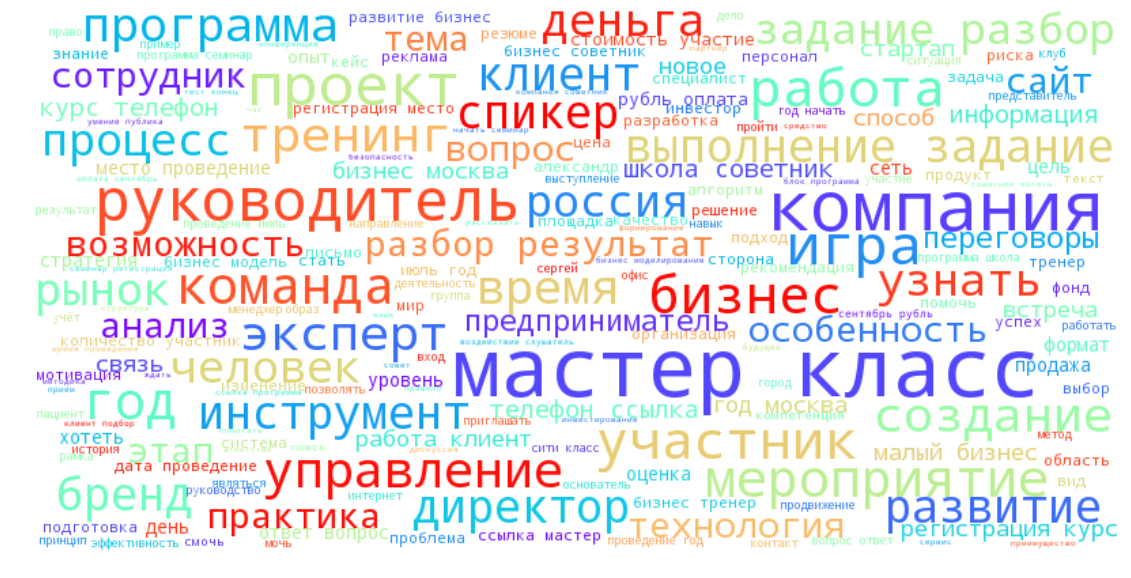

In [73]:
wordcloud = WordCloud(
                        max_font_size=60, 
                        #max_words=200, 
                        stopwords=set(stop_words),
                        #font_path = 'C:/Windows/Fonts/sans-serif.ttf',
                        width=800,
                        height=400,
                        prefer_horizontal=1,
                        background_color='white',
                        colormap = 'rainbow'
                    ).generate(' '.join(texts2017_norm))
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('test.png', bbox_inches='tight', pad_inches = 0.1)
plt.show()

In [76]:
morph.parse('деньги')[0].normal_form

'деньга'

# Pytagcloud with collocations

In [77]:
import nltk
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder, BigramAssocMeasures, TrigramAssocMeasures

## Bigrams

In [122]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text, window_size=2)
Counter(finder.nbest(bigram_measures.pmi, 300)).most_common(20)

[(('nescafe', 'cadbury'), 1),
 (('unilever', 'heineken'), 1),
 (('cможем', 'верно'), 1),
 (('bi', 'прочих'), 1),
 (('anheuser', 'busch'), 1),
 (('norwegian', 'formula'), 1),
 (('active', 'learning'), 1),
 (('fenistil', 'tavegyl'), 1),
 (('ozon', 'tinkoff'), 1),
 (('ivanova', 'thomsonreuters'), 1),
 (('анисина', 'лолита'), 1),
 (('openhospitality', 'org'), 1),
 (('volkswagen', 'akrikhin'), 1),
 (('webex', 'сообщением'), 1),
 (('адаптационный', 'невроз'), 1),
 (('etf', 'робо'), 1),
 (('lierac', 'jacques'), 1),
 (('heineken', 'anheuser'), 1),
 (('centre', 'подъем'), 1),
 (('horeca', 'delivery'), 1)]

In [123]:
d = sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))

In [127]:
dct_list = []
for idx, item in enumerate(d):
    word_list = []
    for word in range(len(item[0])):
        #print(morph.parse(d[idx][0][word])[0].normal_form)
        word_list.append(morph.parse(d[idx][0][word])[0].normal_form)
    dct_list.append(tuple(word_list))
    
print(Counter(dct_list).most_common(20))

[(('человек', 'который'), 8), (('мастер', 'класс'), 8), (('успешный', 'команда'), 7), (('ваш', 'бизнес'), 7), (('проект', 'который'), 7), (('публичный', 'выступление'), 7), (('поделиться', 'свой'), 7), (('свой', 'клиент'), 6), (('компания', 'который'), 6), (('развитие', 'бизнес'), 6), (('ответ', 'вопрос'), 6), (('наш', 'встреча'), 6), (('крупный', 'компания'), 6), (('член', 'команда'), 5), (('проведение', 'тренинг'), 5), (('работа', 'компания'), 5), (('индивидуальный', 'консультация'), 5), (('целевой', 'аудитория'), 5), (('сфера', 'деятельность'), 5), (('менеджер', 'продажа'), 5)]


In [126]:
len(dct_list)

46470

## Trigrams

In [84]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(text, window_size=3)
Counter(finder.nbest(trigram_measures.pmi, 300)).most_common(20)

[(('досудебной', 'претензии', 'надлежащая'), 1),
 (('громадными', 'скалами', 'фантастическими'), 1),
 (('zoe', 'карина', 'мустафаева'), 1),
 (('маи', 'мади', 'мгупс'), 1),
 (('иллюзии', 'пух', 'прах'), 1),
 (('relations', 'индекс', 'цитируемости'), 1),
 (('nesquick', 'nescafe', 'cadbury'), 1),
 (('круглосуточно', 'круглогодично', 'пытается'), 1),
 (('детских', 'садов', 'прошлой'), 1),
 (('known', 'sources', 'such'), 1),
 (('fcb', 'ameriarus', 'амбер'), 1),
 (('лагеря', 'расположившегося', 'недалеко'), 1),
 (('finch', 'industrial', 'tools'), 1),
 (('зарывать', 'сжигать', 'ориентируясь'), 1),
 (('громоздкими', 'интерфейсами', 'бюрократизированным'), 1),
 (('inflation', 'unemployment', 'fiscal'), 1),
 (('бакалавра', 'oxford', 'brookes'), 1),
 (('астролог', 'массажист', 'спорткары'), 1),
 (('джонатоном', 'минчином', 'координатором'), 1),
 (('kamaz', 'levis', 'уралкалий'), 1)]

In [80]:
text[:20]

['октября',
 'главном',
 'корпусе',
 'мэи',
 'сможешь',
 'найти',
 'работу',
 'подработку',
 'посетить',
 'мастер',
 'классы',
 'ведущих',
 'порталов',
 'трудоустройству',
 'поучаствовать',
 'конкурсах',
 'также',
 'получить',
 'подарки',
 'компаний']